In [158]:
# SMA and EMA : Simple moving avg and Exponetail moving avg
import pandas as pd 

datasets = ['RELIANCE__EQ__NSE__NSE__MINUTE.csv','BPCL__EQ__NSE__NSE__MINUTE.csv','GAIL__EQ__NSE__NSE__MINUTE.csv',
            'IOC__EQ__NSE__NSE__MINUTE.csv','INFY__EQ__NSE__NSE__MINUTE.csv']
def dataset_read(Data,time_series):

    Data = Data.set_index(pd.DatetimeIndex(Data['timestamp']))
    from collections import OrderedDict
    rel_df= Data.resample(time_series).agg(
        OrderedDict([
            ('open', 'first'),
            ('high', 'max'),
            ('low', 'min'),
            ('close', 'last'),
            ('volume', 'sum'),
        ])
    )
    rel_df.dropna(inplace=True)
    rel_df['MA20'] = rel_df['close'].rolling(window=20).mean()
    rel_df['MA100'] = rel_df['close'].rolling(window=20).mean()
    rel_df.dropna(inplace=True)
    return rel_df

In [148]:
rel_df.head()

,open,high,low,close,volume,MA20,MA100,return
timestamp,,,,,,,,
2017-06-23 00:00:00+05:30,718.50,720.75,715.35,716.75,14223454.0,680.6625,642.4275,-0.000906
2017-06-27 00:00:00+05:30,716.03,721.35,712.50,720.00,14879462.0,682.7810,644.4025,0.004534
2017-06-28 00:00:00+05:30,719.55,719.60,698.00,699.90,7097832.0,683.7760,646.1775,-0.027917
2017-06-29 00:00:00+05:30,700.00,704.95,695.13,696.18,5871146.0,685.0800,647.8893,-0.005315
2017-06-30 00:00:00+05:30,696.00,696.20,687.53,691.50,3561298.0,686.4085,649.5765,-0.006722


In [149]:
rel_df['MA20'] = rel_df['close'].rolling(window=20).mean()

In [150]:
rel_df.head()

,open,high,low,close,volume,MA20,MA100,return
timestamp,,,,,,,,
2017-06-23 00:00:00+05:30,718.50,720.75,715.35,716.75,14223454.0,NaN,642.4275,-0.000906
2017-06-27 00:00:00+05:30,716.03,721.35,712.50,720.00,14879462.0,NaN,644.4025,0.004534
2017-06-28 00:00:00+05:30,719.55,719.60,698.00,699.90,7097832.0,NaN,646.1775,-0.027917
2017-06-29 00:00:00+05:30,700.00,704.95,695.13,696.18,5871146.0,NaN,647.8893,-0.005315
2017-06-30 00:00:00+05:30,696.00,696.20,687.53,691.50,3561298.0,NaN,649.5765,-0.006722


In [151]:
rel_df.dropna(inplace = True, axis = 0)

In [152]:
rel_df.head()

,open,high,low,close,volume,MA20,MA100,return
timestamp,,,,,,,,
2017-07-21 00:00:00+05:30,773.75,795.85,773.20,792.00,44170680.0,737.3725,681.7140,0.037423
2017-07-24 00:00:00+05:30,799.50,812.45,792.95,809.20,19762966.0,741.9950,683.6182,0.021717
2017-07-25 00:00:00+05:30,812.00,812.35,798.80,801.25,9136558.0,746.0575,685.4424,-0.009825
2017-07-26 00:00:00+05:30,802.35,814.95,800.55,810.58,10023928.0,751.5915,687.3902,0.011644
2017-07-27 00:00:00+05:30,815.00,815.75,794.23,796.40,8396382.0,756.6025,689.1794,-0.017494


Time series is  15T


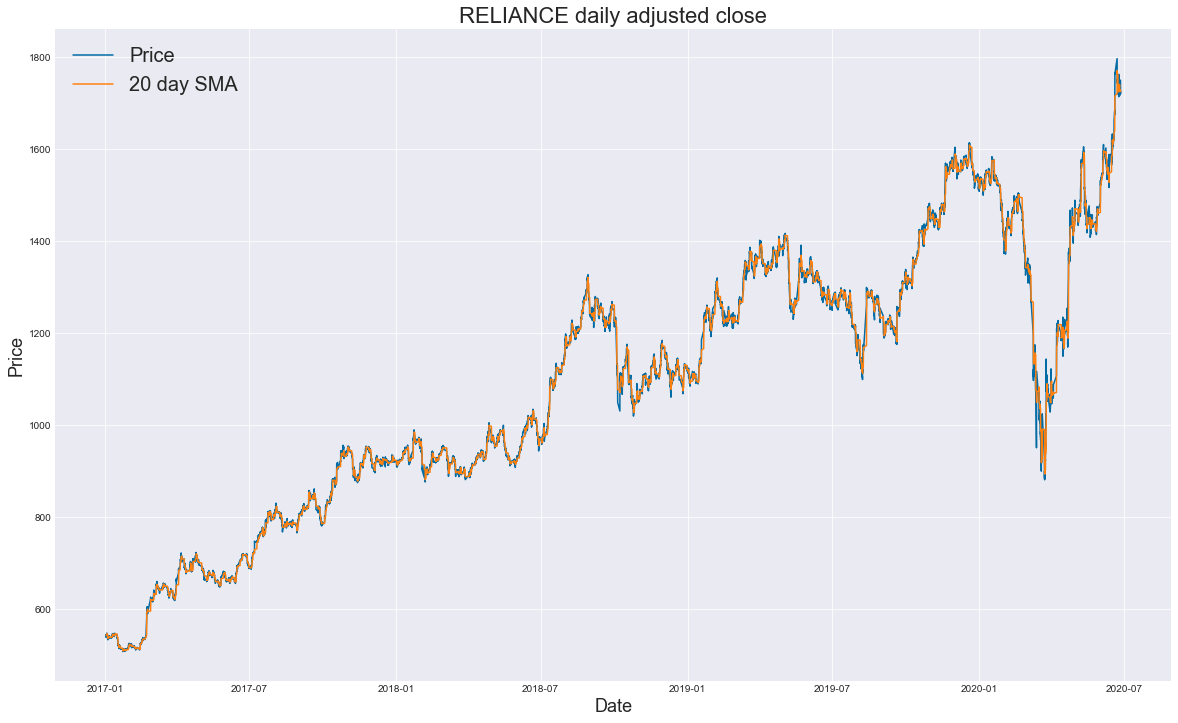

Time series is  1d


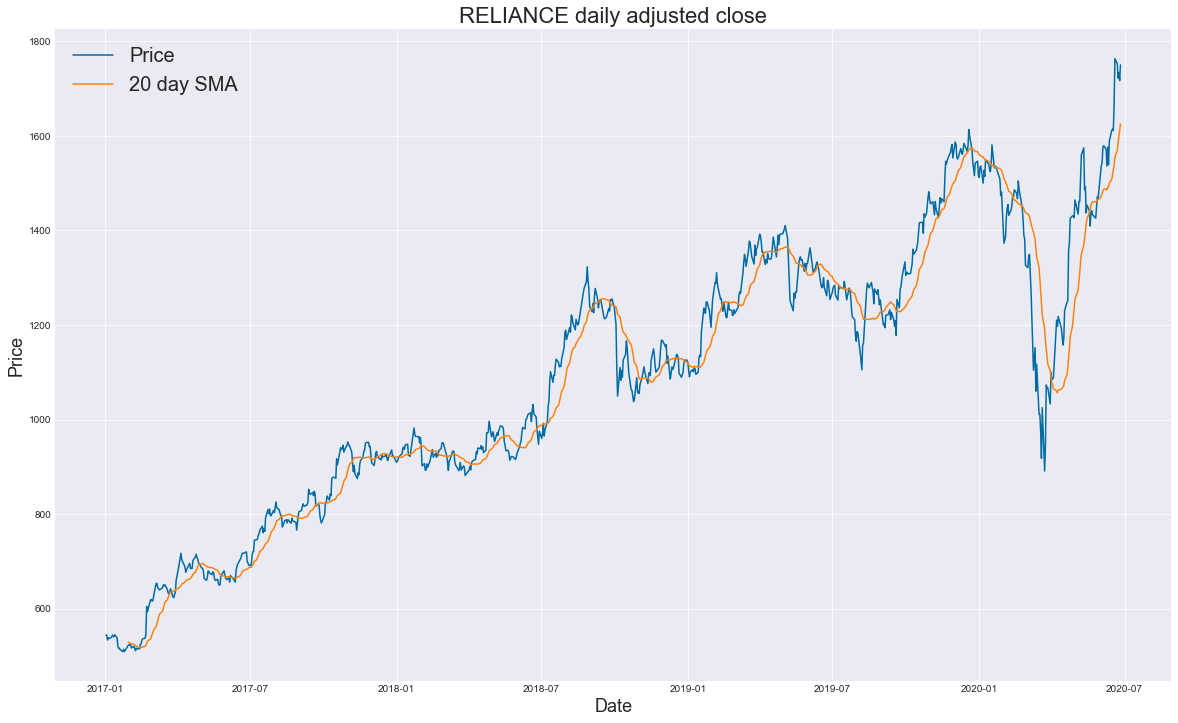

Time series is  15T


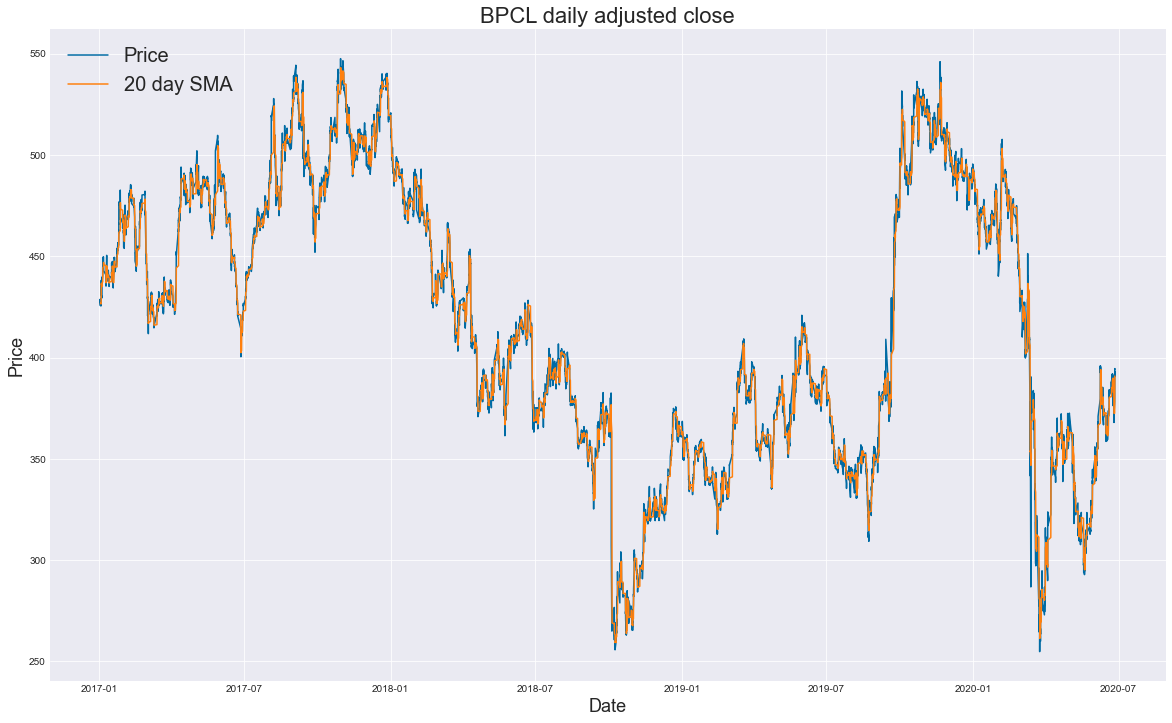

Time series is  1d


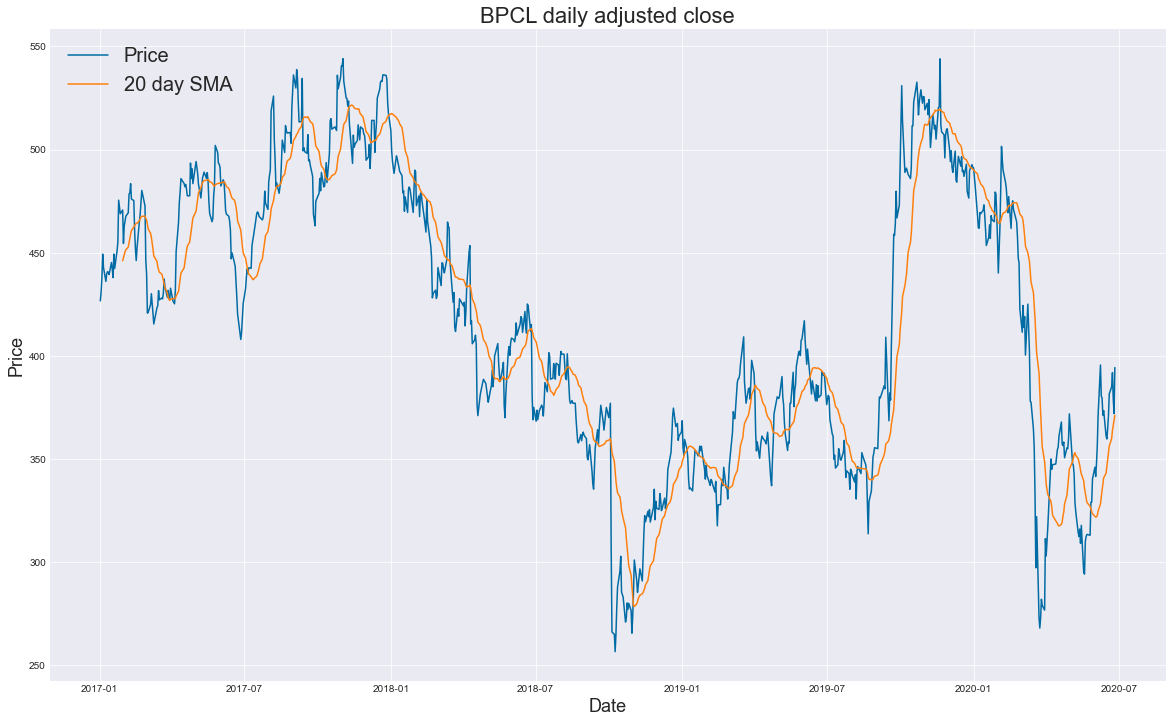

Time series is  15T


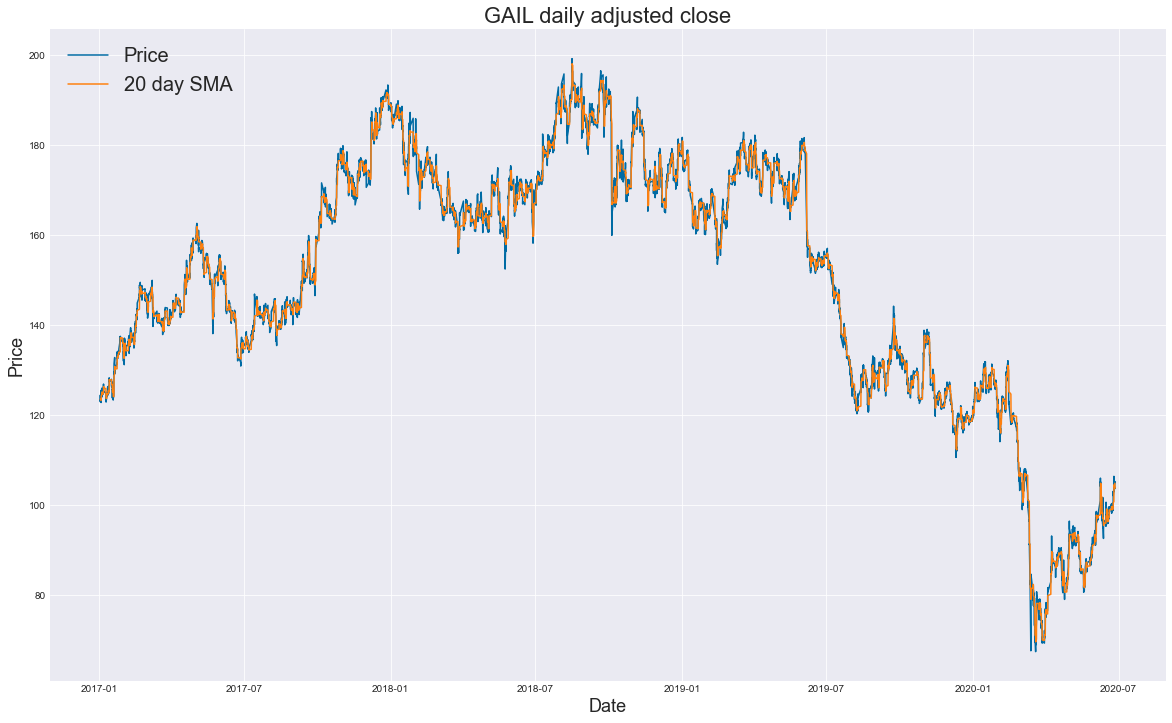

Time series is  1d


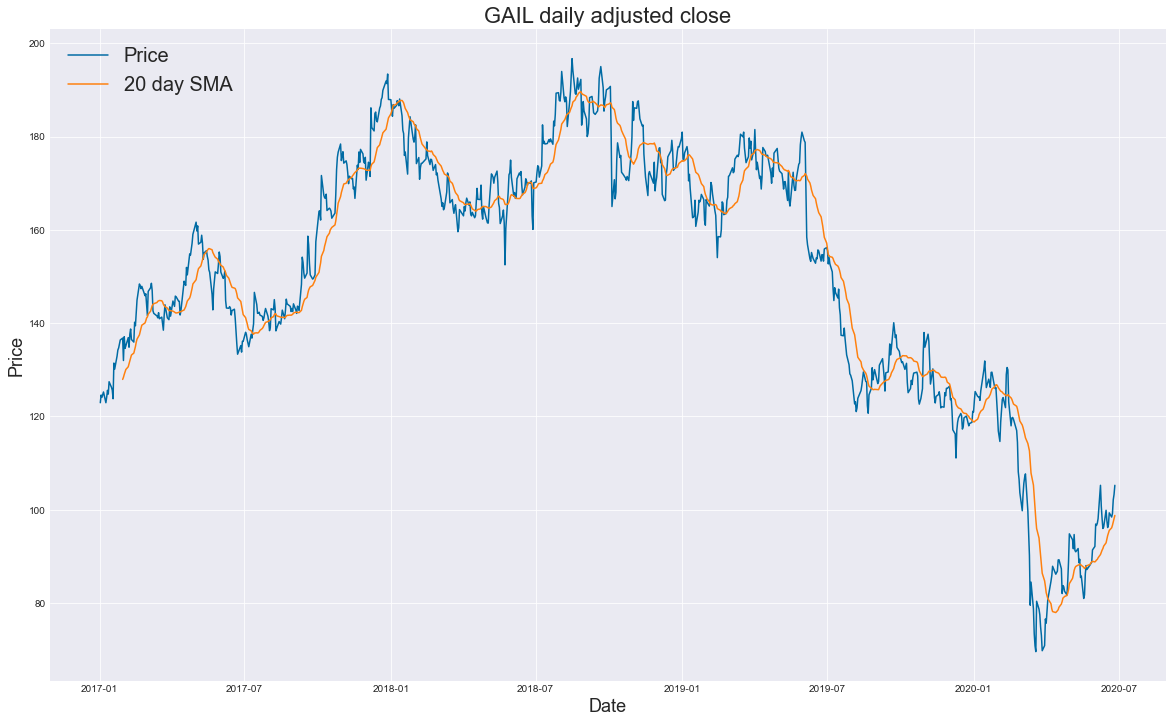

Time series is  15T


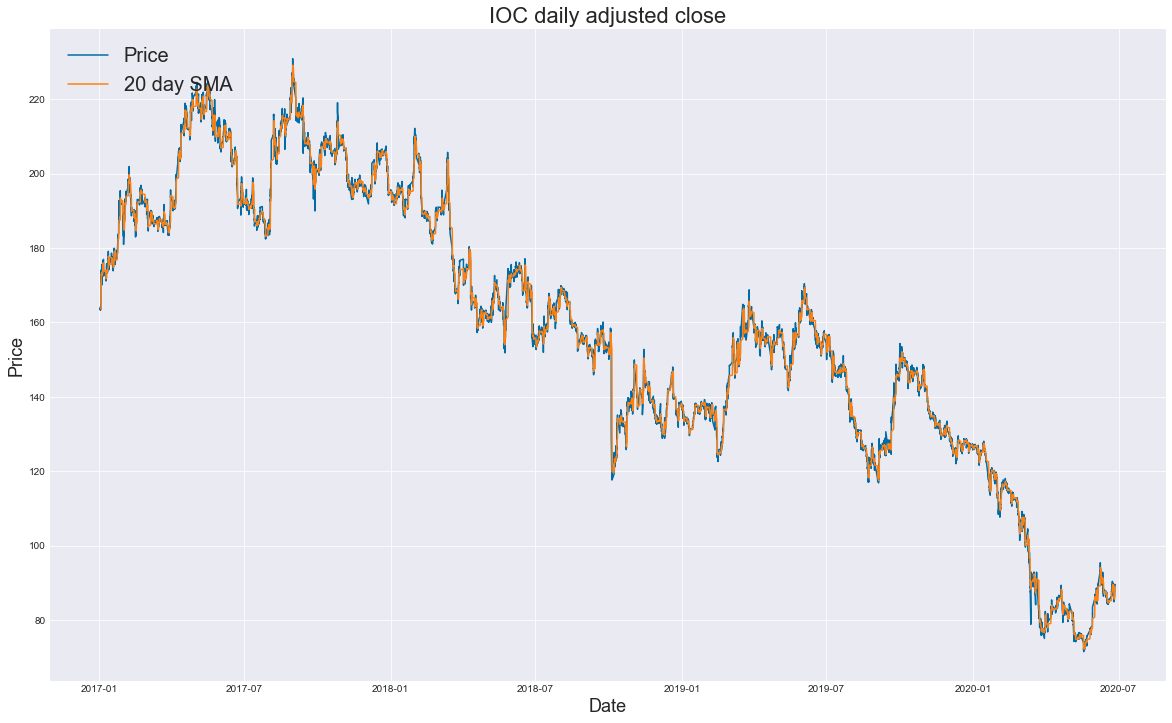

Time series is  1d


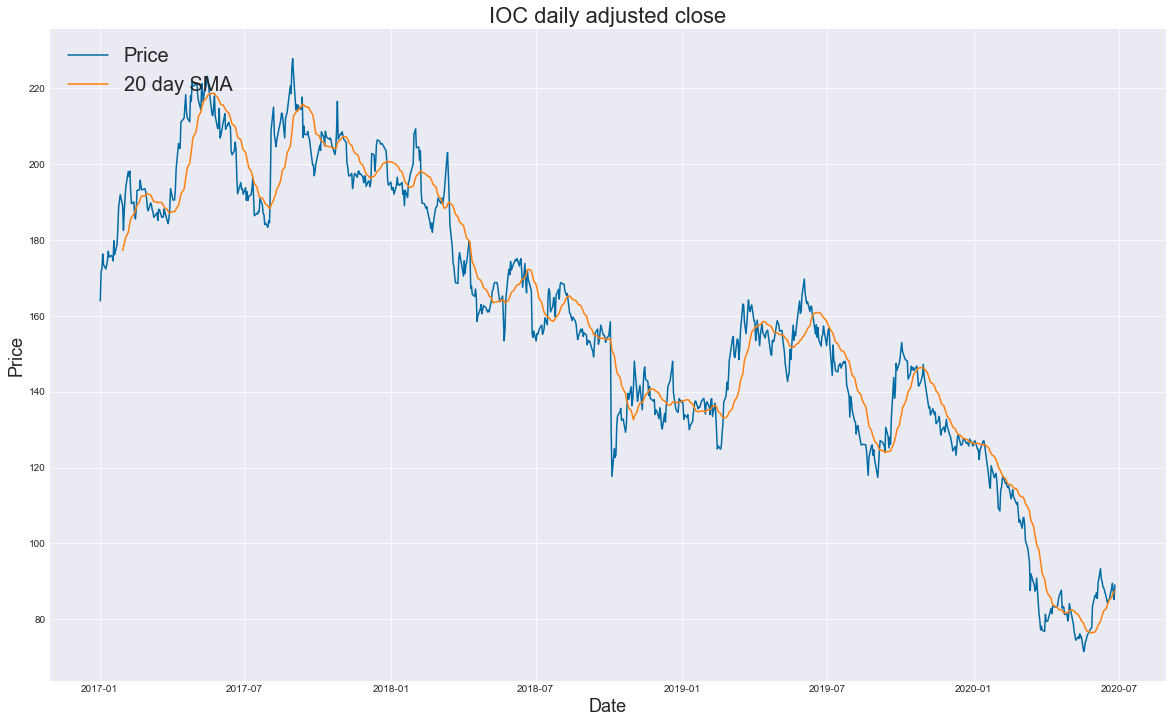

Time series is  15T


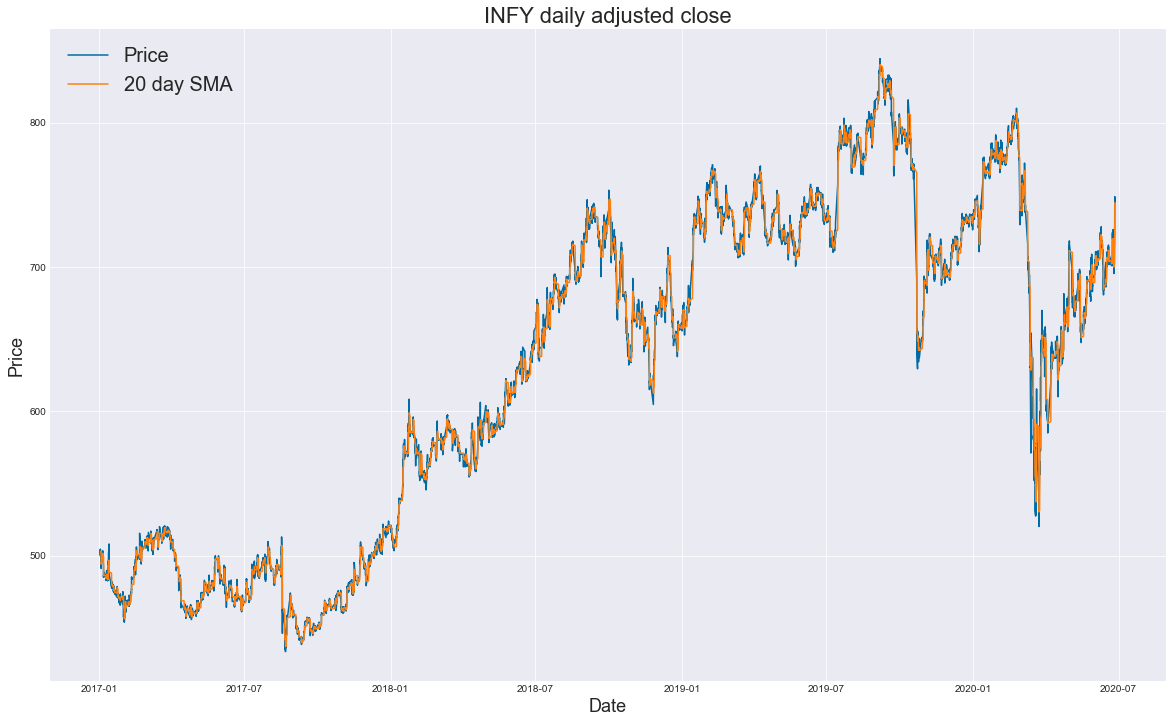

Time series is  1d


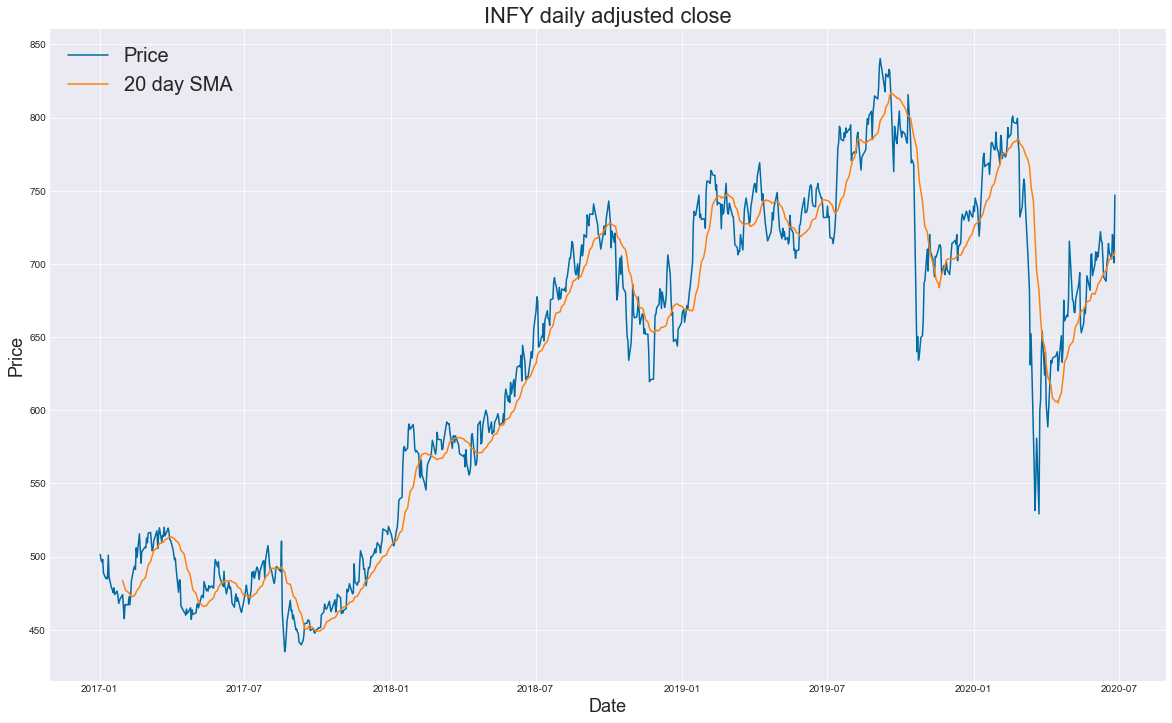

In [156]:
import matplotlib.pyplot as plt
import matplotlib as mpl# Set color style

def plot_graph(df ,name):
    plt.style.use('seaborn-dark')
    plt.style.use("tableau-colorblind10")
    fig = plt.figure(figsize=(20,12))
    ax1 = plt.plot(df["close"])
    ax1 = plt.plot(df["MA20"])
    # ax1 = plt.plot(rel_df["volume"])

    ax1 = plt.title(name +" daily adjusted close", fontsize=22)
    ax1 = plt.xlabel("Date", fontsize=18)
    ax1 = plt.ylabel("Price", fontsize=18)
    ax1 = plt.legend(["Price", "20 day SMA" ],prop={"size":20}, loc="upper left")
    plt.grid(True)
    plt.show()

for i in datasets:
    data = pd.read_csv(i)
    for j in ["15T","1d"]:
        print("Time series is " , j)
        plot_graph(dataset_read(data , j) ,i.split("_")[0])

Time series is  15T


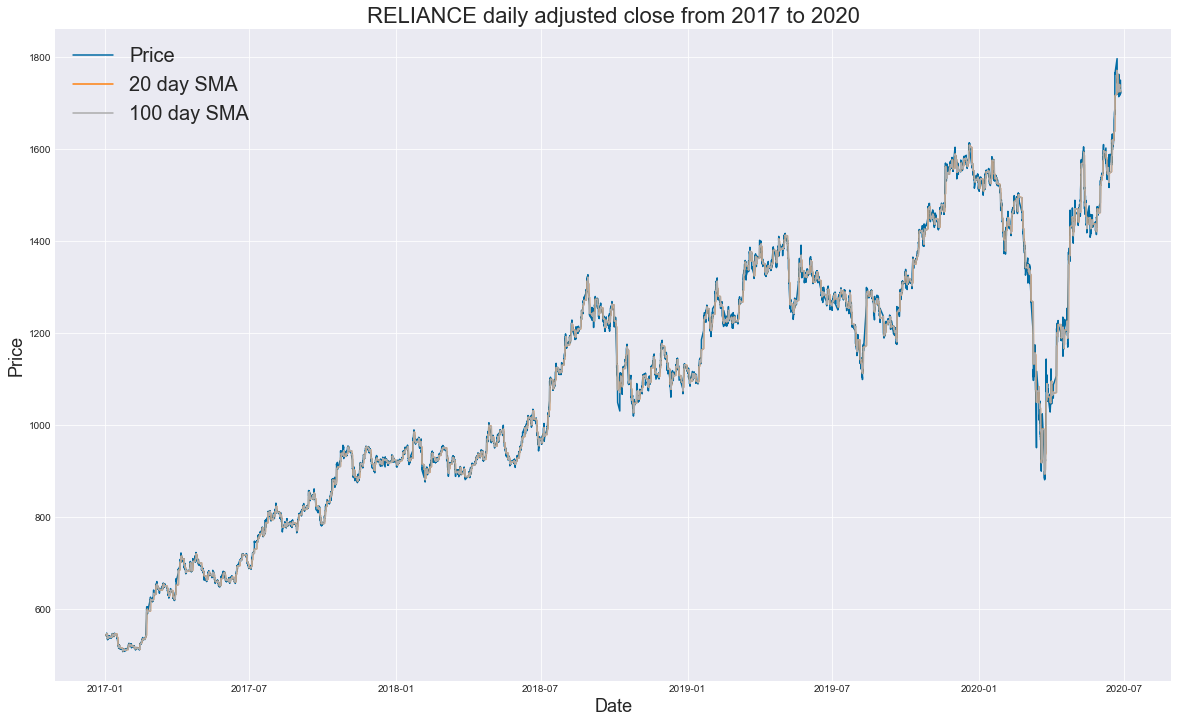

Time series is  1d


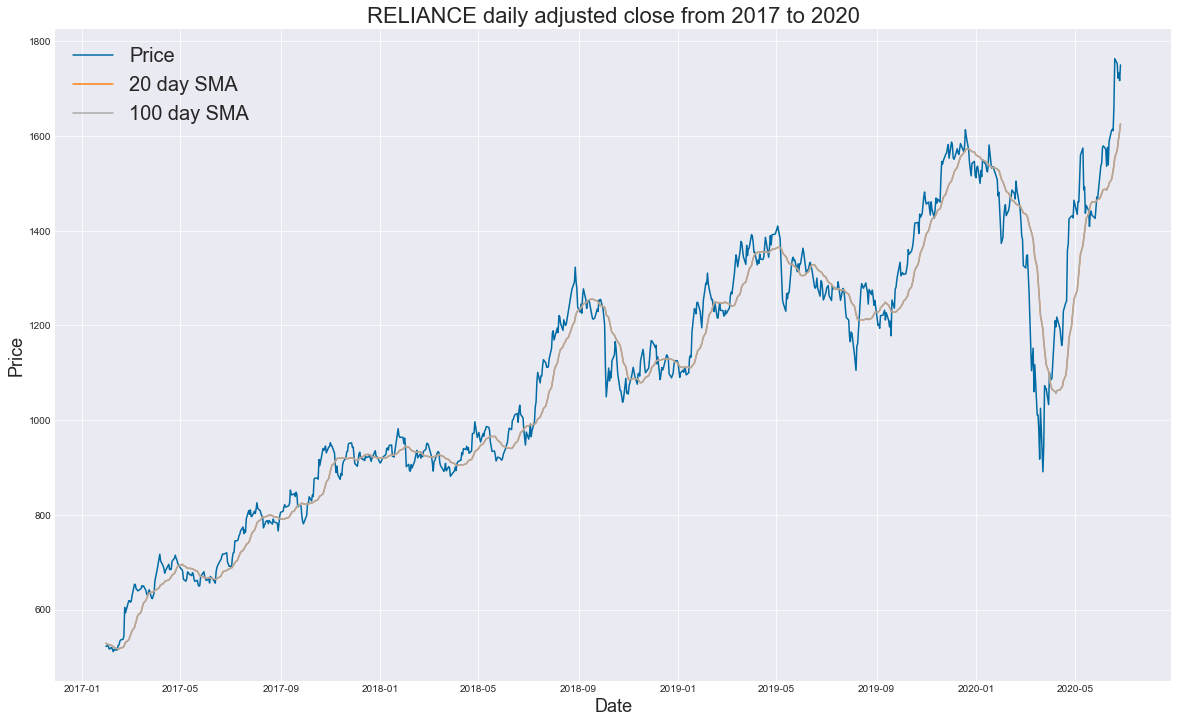

Time series is  15T


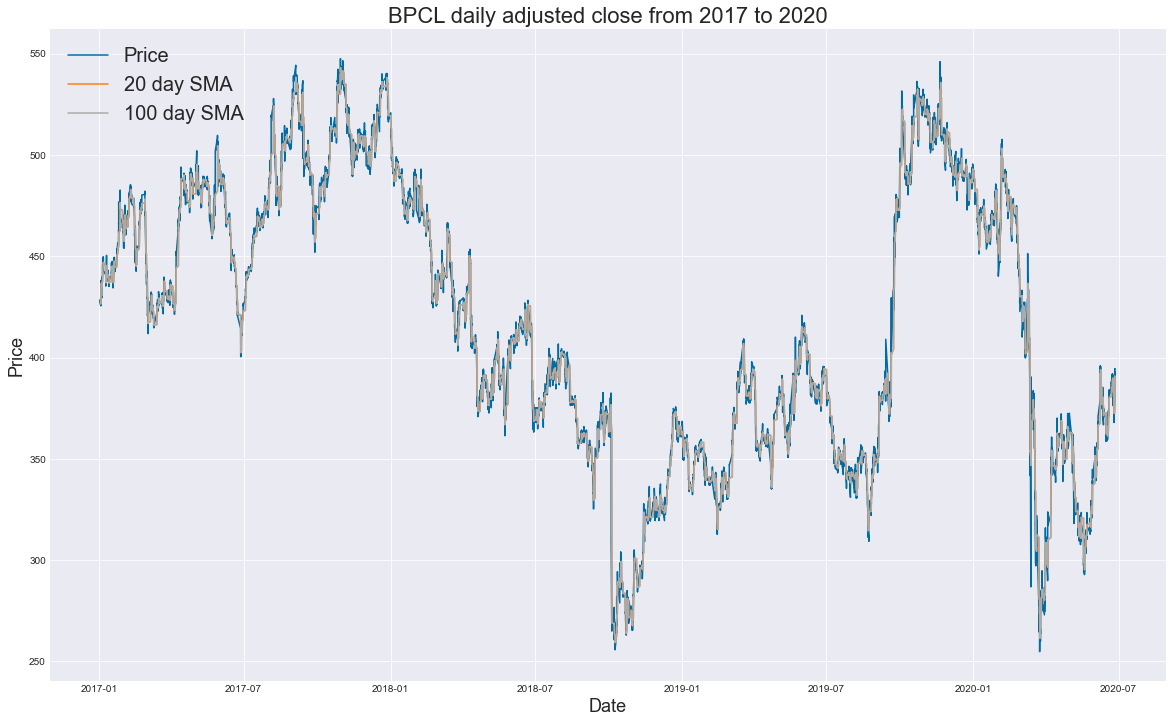

Time series is  1d


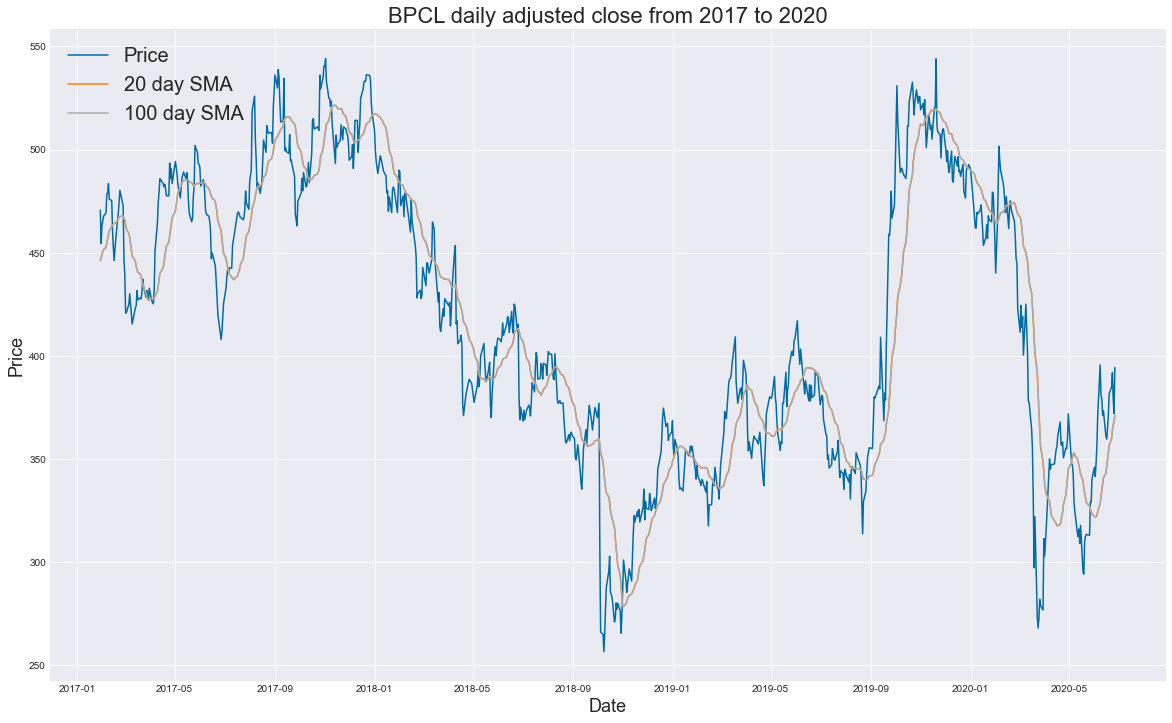

Time series is  15T


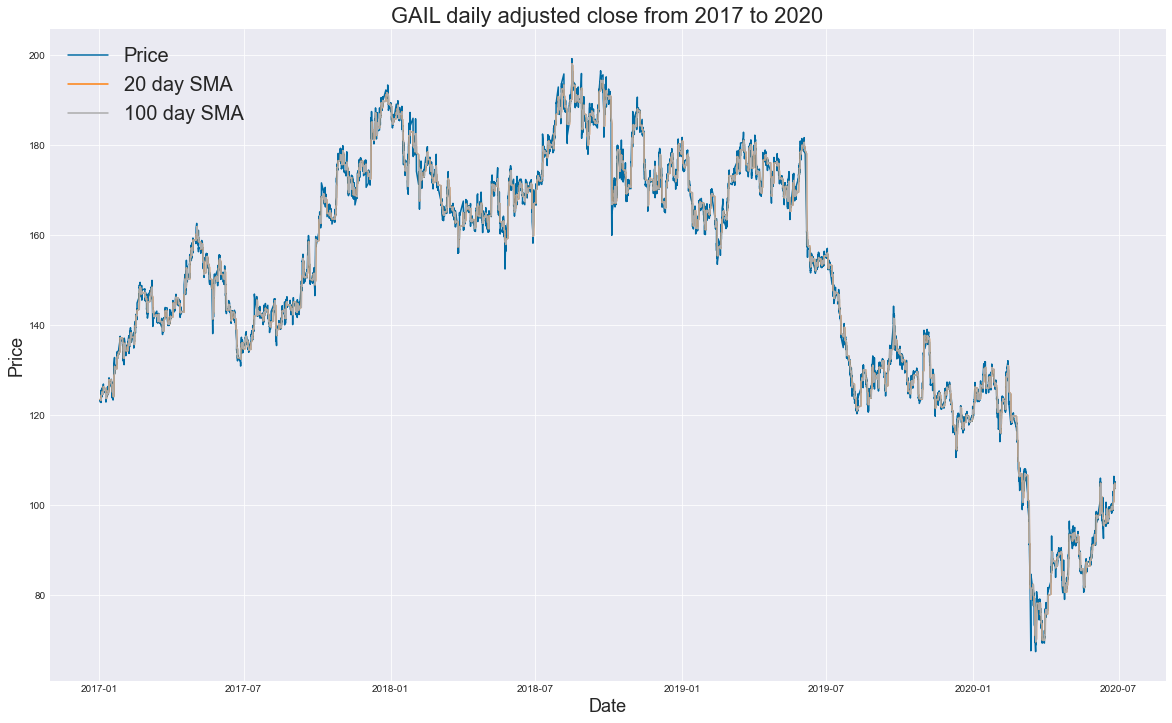

Time series is  1d


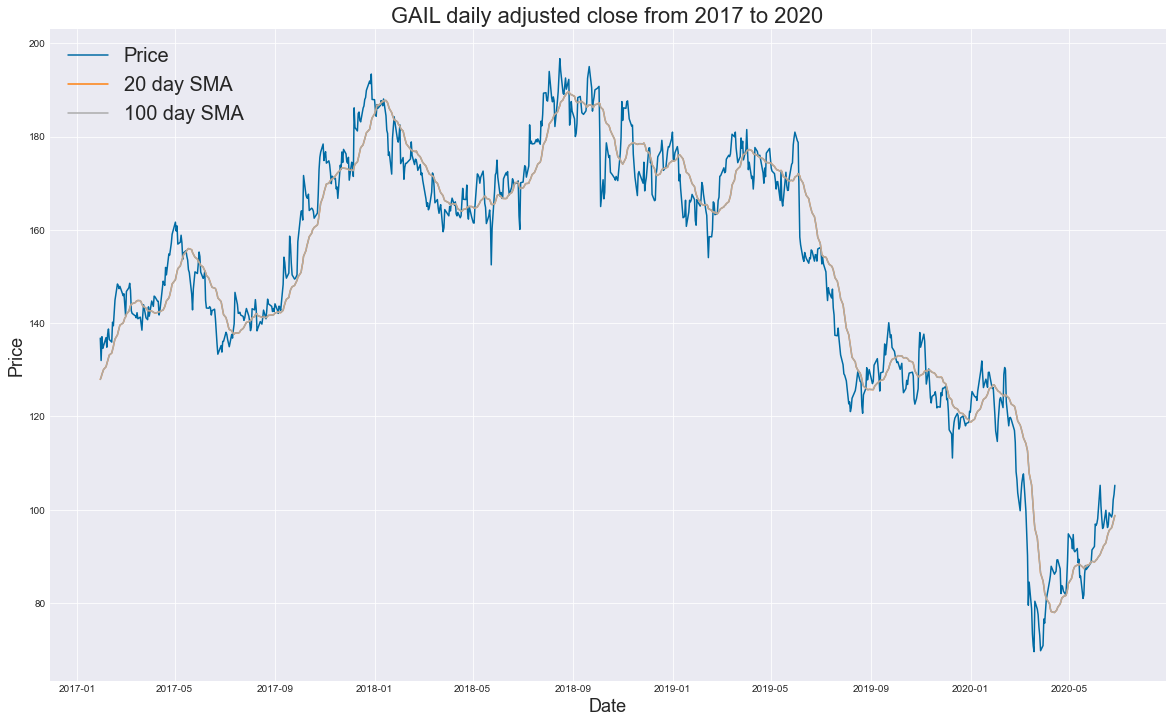

Time series is  15T


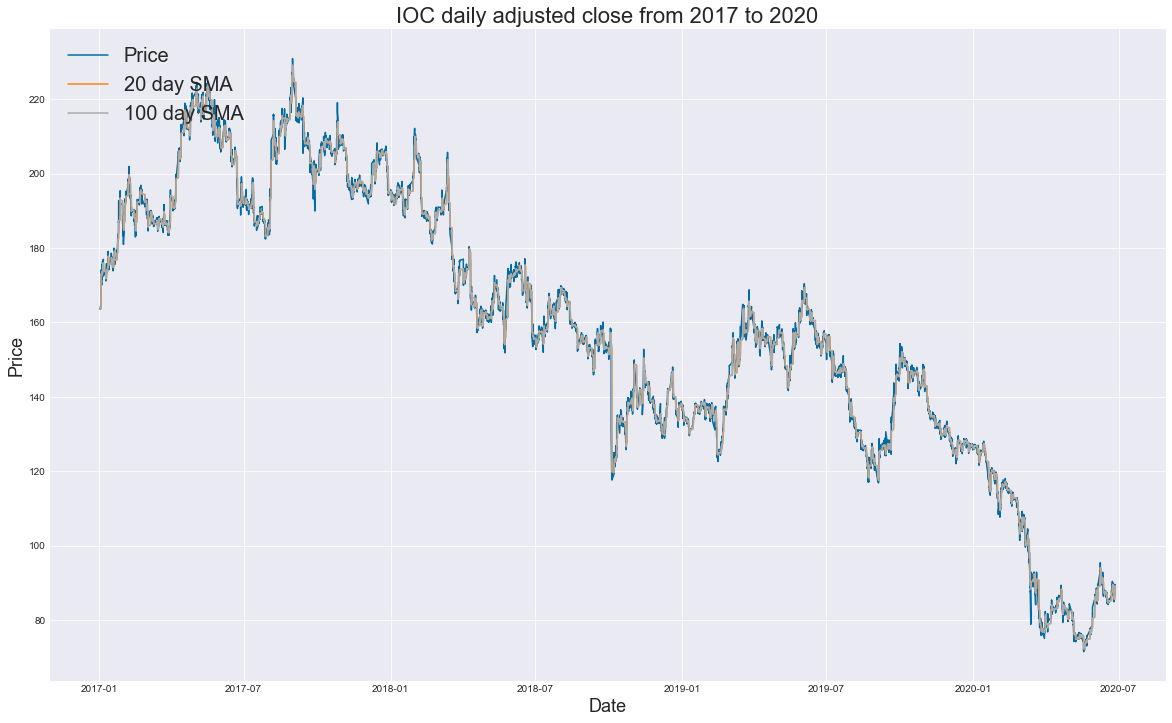

Time series is  1d


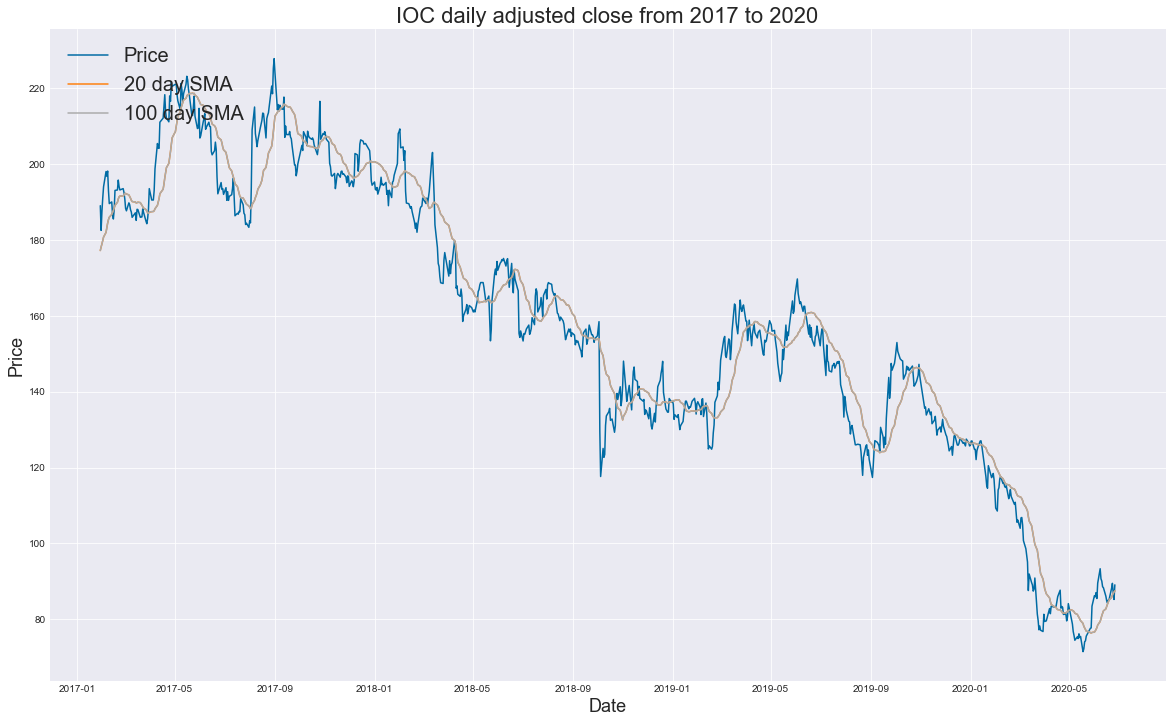

Time series is  15T


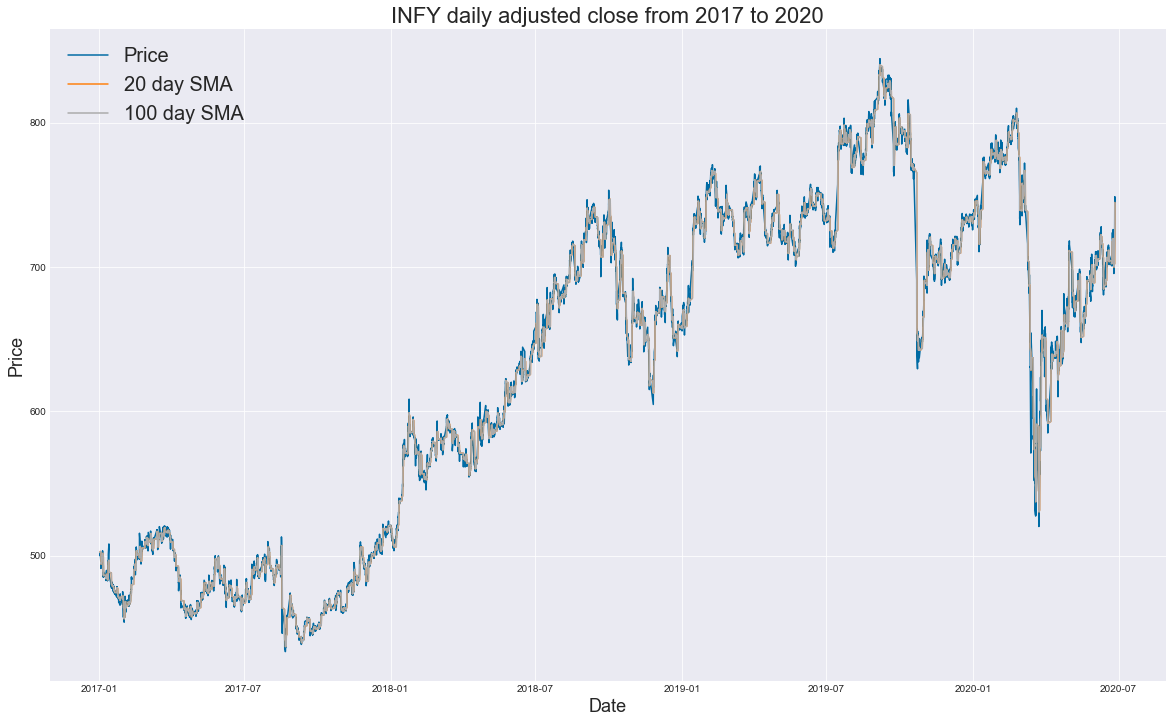

Time series is  1d


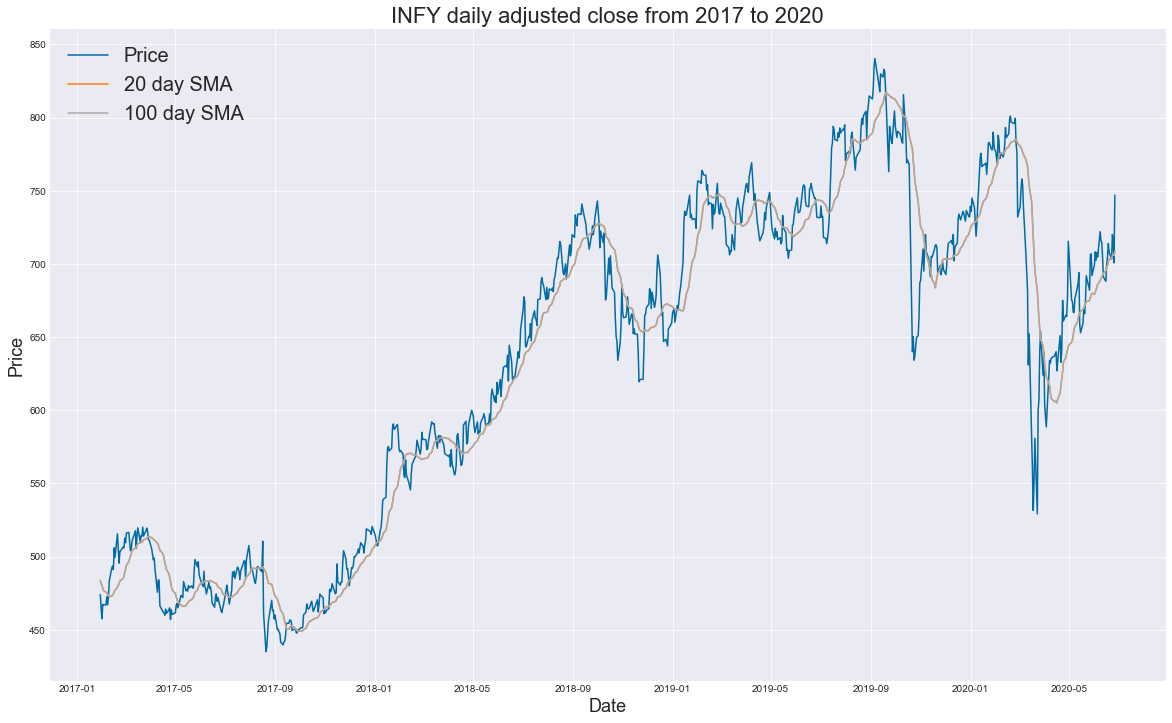

In [159]:
import matplotlib.pyplot as plt
import matplotlib as mpl# Set color style

def comp_20_100(rel_df ,name):
#     rel_df['MA100'] = rel_df['close'].rolling(window=100).mean()
#     rel_df['MA100'] = rel_df['close'].rolling(window=20).mean()
    plt.style.use('seaborn-dark')
    plt.style.use("tableau-colorblind10")
    fig = plt.figure(figsize=(20,12))
    ax1 = plt.plot(rel_df["close"])
    ax1 = plt.plot(rel_df["MA20"])
    ax1 = plt.plot(rel_df["MA100"])

    ax1 = plt.title(name+" daily adjusted close from 2017 to 2020", fontsize=22)
    ax1 = plt.xlabel("Date", fontsize=18)
    ax1 = plt.ylabel("Price", fontsize=18)
    ax1 = plt.legend(["Price", "20 day SMA","100 day SMA"],prop={"size":20}, loc="upper left")
    plt.grid(True)
    plt.show()

    # Bullish Crossover and  Bearish Crossover
for i in datasets:
    data = pd.read_csv(i)
    for j in ["15T","1d"]:
        print("Time series is " , j)
        comp_20_100(dataset_read(data , j) ,i.split("_")[0])

In [17]:
#We will use two different strategies

   # 1. Buy when the price exceeds the moving average, short sell when the price drops below the moving average.
   #2. As an alternative we can replace the short position with cash position, making the strategy long only.

In [116]:
# new_df = [[rel_df['close']],[rel_df['MA20']],[rel_df['MA100']]]
new_df = rel_df[["close"]]
new_df.rename(columns={"close":"Price"}, inplace=True)# Remove the first row,
new_df = new_df.iloc[1:]
new_df.head()
new_df['volume'] = rel_df[["volume"]].rolling(window=20).mean()

# new_df['MA20'] = rel_df[["MA20"]]
# Position = []
# for i in range(0,new_df.shape[0]):
#     if new_df["close"].iloc[i] > new_df["MA20"].iloc[i]:
#         Position.append("Long")
#     else:
#         Position.append("Short")
#         new_df["Position"] = Position
# new_df.head()


C:\Users\koosappaM\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [117]:
new_df['MA20'] = new_df["Price"].rolling(window=20).mean()

In [118]:
new_df.head()

,Price,volume,MA20
timestamp,,,
2017-01-31 00:00:00+05:30,522.40,NaN,NaN
2017-02-01 00:00:00+05:30,525.00,NaN,NaN
2017-02-02 00:00:00+05:30,522.78,NaN,NaN
2017-02-03 00:00:00+05:30,516.73,NaN,NaN
2017-02-06 00:00:00+05:30,520.35,NaN,NaN


In [119]:
new_df.isnull().sum()

Price      0
volume    18
MA20      19
dtype: int64

In [165]:
def adding_new_pos(new_df ,name):
    
    Position = []
    new_df = new_df.iloc[1:]
    for i in range(0,new_df.shape[0]):
        if new_df['close'].iloc[i] > new_df['MA20'].iloc[i]:
            Position.append("Long")
        else:
            Position.append("Short")

    new_df["Position"] = Position
#     print("Data Frame",new_df.head())
    return new_df
dframe = []
count = 0
for i in datasets:
    data = pd.read_csv(i)
    if count ==1:
        
        break
    count+=1 
    for j in ["15T","1d"]:
        print("Time series is " , j )
        df = adding_new_pos(dataset_read(data , j) ,i.split("_")[0])
        dframe.append(df)

print("Dataframe::::",dframe)

Time series is  15T


C:\Users\koosappaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Time series is  1d
Dataframe:::: [                              open     high      low    close     volume  \
timestamp                                                                  
2017-01-02 14:15:00+05:30   543.45   543.75   543.13   543.50   119642.0   
2017-01-02 14:30:00+05:30   543.48   544.25   543.45   543.50   114262.0   
2017-01-02 14:45:00+05:30   543.50   543.73   542.15   542.40   161892.0   
2017-01-02 15:00:00+05:30   542.38   542.75   541.85   542.63   152024.0   
2017-01-02 15:15:00+05:30   542.63   543.50   542.03   543.50   275308.0   
...                            ...      ...      ...      ...        ...   
2020-06-26 14:15:00+05:30  1723.60  1734.25  1723.50  1731.75   716502.0   
2020-06-26 14:30:00+05:30  1731.30  1737.40  1729.05  1733.90   641699.0   
2020-06-26 14:45:00+05:30  1734.00  1734.00  1723.20  1727.35   539081.0   
2020-06-26 15:00:00+05:30  1727.30  1742.50  1727.30  1741.45  1167664.0   
2020-06-26 15:15:00+05:30  1741.55  1752.00  1740.00  

In [167]:
def return_close(new_df):
    
    new_df['return'] = (new_df['close']-new_df['close'].shift())/ new_df['close'].shift()# The first return is defined from the 2. row, so drop the first
    new_df.dropna(inplace=True)
    return new_df

df = return_close(dframe[0])
df.head()

,open,high,low,close,volume,MA20,MA100,Position,return
timestamp,,,,,,,,,
2017-01-02 14:30:00+05:30,543.48,544.25,543.45,543.50,114262.0,543.8420,543.8420,Short,0.000000
2017-01-02 14:45:00+05:30,543.50,543.73,542.15,542.40,161892.0,543.8320,543.8320,Short,-0.002024
2017-01-02 15:00:00+05:30,542.38,542.75,541.85,542.63,152024.0,543.8295,543.8295,Short,0.000424
2017-01-02 15:15:00+05:30,542.63,543.50,542.03,543.50,275308.0,543.8195,543.8195,Short,0.001603
2017-01-03 09:15:00+05:30,544.90,544.90,540.55,542.70,135606.0,543.8195,543.8195,Short,-0.001472


In [171]:
import numpy as np
def indicators_(new_df):
    LongShort = [0]*new_df.shape[0]
    LongHold = [0]*new_df.shape[0]
    LongShort[0] = new_df['close'].iloc[0]
    LongShort[1] = new_df['close'].iloc[0]
    LongHold[0] = new_df['close'].iloc[0] 
    LongHold[1] = new_df['close'].iloc[0]
    for i in range(0, new_df.shape[0]-2):
        if new_df['Position'].iloc[i] == 'Long':
            LongShort[i+2] = LongShort[i+1]*(1+new_df['return'][i+2])
        else:
            LongShort[i+2] = LongShort[i+1]/(1+new_df['return'][i+2])

    for i in range(0, new_df.shape[0]-2):
        if new_df['Position'].iloc[i] == 'Long':
            LongHold[i+2] = LongHold[i+1]*(1+new_df['return'][i+2])
        else:
            LongHold[i+2] = LongHold[i+1]
            new_df['LongShort'] = LongShort
    new_df['LongHold'] = LongHold
    new_df['Signal'] = 0.0
    new_df['Signal'] = np.where(new_df['MA20'] > new_df['MA100'], 1.0, 0.0)
    new_df['Pos'] = new_df['Signal'].diff()
    new_df.drop(new_df.tail(1).index,inplace=True)
    return new_df
ind_df = indicators_(df)
ind_df.head()

,open,high,low,close,volume,MA20,MA100,Position,return,LongShort,LongHold,Signal,Pos
timestamp,,,,,,,,,,,,,
2017-01-02 14:30:00+05:30,543.48,544.25,543.45,543.50,114262.0,543.8420,543.8420,Short,0.000000,543.500000,543.5,0.0,NaN
2017-01-02 14:45:00+05:30,543.50,543.73,542.15,542.40,161892.0,543.8320,543.8320,Short,-0.002024,543.500000,543.5,0.0,0.0
2017-01-02 15:00:00+05:30,542.38,542.75,541.85,542.63,152024.0,543.8295,543.8295,Short,0.000424,543.269631,543.5,0.0,0.0
2017-01-02 15:15:00+05:30,542.63,543.50,542.03,543.50,275308.0,543.8195,543.8195,Short,0.001603,542.400000,543.5,0.0,0.0
2017-01-03 09:15:00+05:30,544.90,544.90,540.55,542.70,135606.0,543.8195,543.8195,Short,-0.001472,543.199558,543.5,0.0,0.0


In [123]:
(new_df['Position']=="Long").count()

820

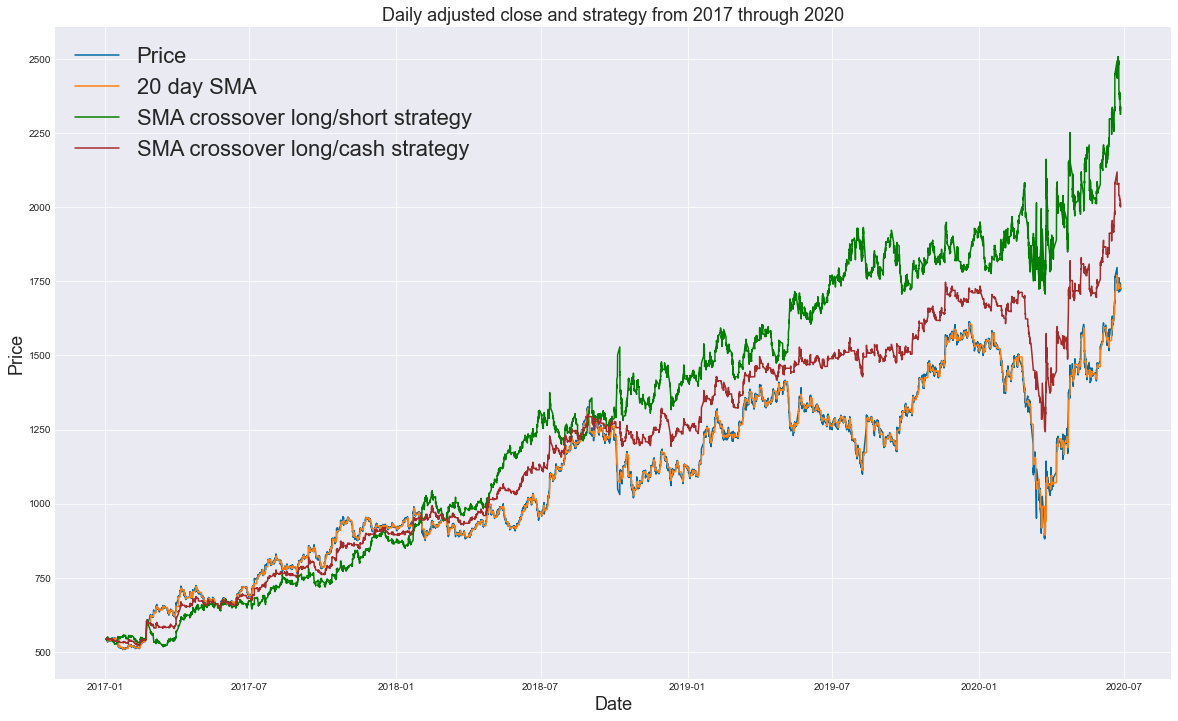

In [169]:
def plot_long(new_df):
    fig = plt.figure(figsize=(20,12))
    ax1 = plt.plot(new_df['close'])
    ax1 = plt.plot(new_df['MA20'])
    ax1 = plt.plot(new_df['LongShort'], color='green')
    ax1 = plt.plot(new_df['LongHold'], color='brown')
    ax1 = plt.title('Daily adjusted close and strategy from 2017 through 2020', fontsize=18)
    ax1 = plt.xlabel('Date', fontsize=18)
    ax1 = plt.ylabel('Price', fontsize=18)
    ax1 = plt.legend(['Price', '20 day SMA', 'SMA crossover long/short strategy',
     'SMA crossover long/cash strategy'],prop={'size':22}, loc='upper left')
    plt.grid(True)
    plt.show()

plot_long(ind_df)

In [125]:
import numpy as np
#indicators 
new_df['MA100'] = new_df["Price"].rolling(window=100).mean()
new_df['Signal'] = 0.0
new_df['Signal'] = np.where(new_df['MA20'] > new_df['MA100'], 1.0, 0.0)

In [126]:
new_df['Pos'] = new_df['Signal'].diff()
# display first few rows
new_df.head()

,Price,volume,MA20,Position,return,LongShort,LongHold,MA100,Signal,Pos
timestamp,,,,,,,,,,
2017-02-28 00:00:00+05:30,618.83,11843063.9,540.8580,Long,0.000081,618.830000,618.830000,NaN,0.0,NaN
2017-03-01 00:00:00+05:30,615.80,12054236.7,545.5280,Long,-0.004896,618.830000,618.830000,NaN,0.0,0.0
2017-03-02 00:00:00+05:30,617.48,12208415.1,550.1520,Long,0.002728,620.518266,620.518266,NaN,0.0,0.0
2017-03-03 00:00:00+05:30,629.10,13924804.6,555.4680,Long,0.018818,632.195442,632.195442,NaN,0.0,0.0
2017-03-06 00:00:00+05:30,653.50,15144869.1,562.3065,Long,0.038786,656.715500,656.715500,NaN,0.0,0.0


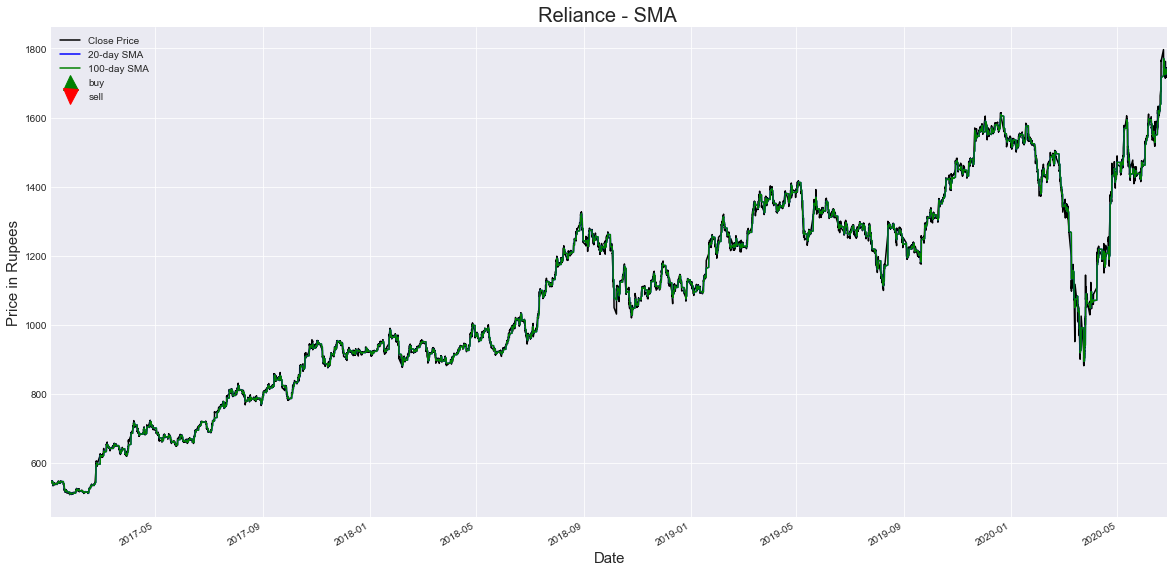

In [173]:
def plot_sma(new_df):
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    new_df['close'].plot(color = 'k', label= 'Close Price') 
    new_df['MA20'].plot(color = 'b',label = '20-day SMA') 
    new_df['MA100'].plot(color = 'g', label = '100-day SMA')
    # plot ‘buy’ signals
    plt.plot(new_df[new_df['Pos'] == 1].index, 
             new_df['MA20'][new_df['Pos'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(new_df[new_df['Pos'] == -1].index, 
             new_df['MA20'][new_df['Pos'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title('Reliance - SMA ', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()

plot_sma(ind_df)

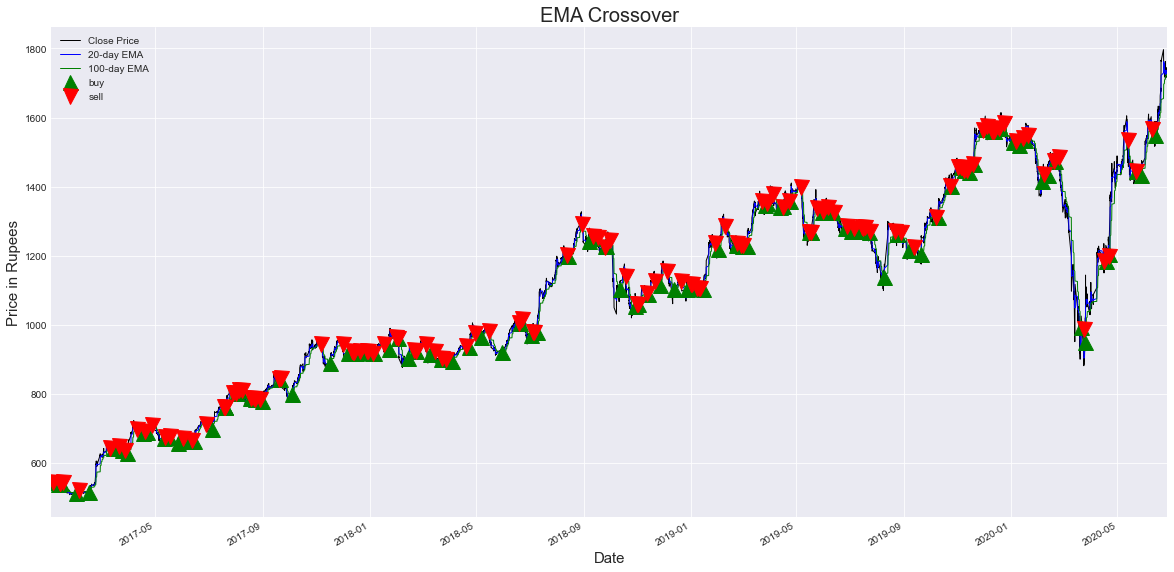

In [174]:
#EMA
# Create 20 days exponential moving average column
def plot_EMA(new_df):
    new_df['20_EMA'] = new_df['close'].ewm(span = 20, adjust = False).mean()
    # Create 100 days exponential moving average column
    new_df['100_EMA'] = new_df['close'].ewm(span = 100, adjust = False).mean()
    # create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0

    new_df['Signal'] = 0.0  
    new_df['Signal'] = np.where(new_df['20_EMA'] > new_df['100_EMA'], 1.0, 0.0)
    # create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
    new_df['Pos1'] = new_df['Signal'].diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    new_df['close'].plot(color = 'k', lw = 1, label = 'Close Price')  
    new_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
    new_df['100_EMA'].plot(color = 'g', lw = 1, label = '100-day EMA')
    # plot ‘buy’ and 'sell' signals
    plt.plot(new_df[new_df['Pos1'] == 1].index, 
             new_df['20_EMA'][new_df['Pos1'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    plt.plot(new_df[new_df['Pos1'] == -1].index, 
             new_df['20_EMA'][new_df['Pos1'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title('EMA Crossover', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
plot_EMA(ind_df)

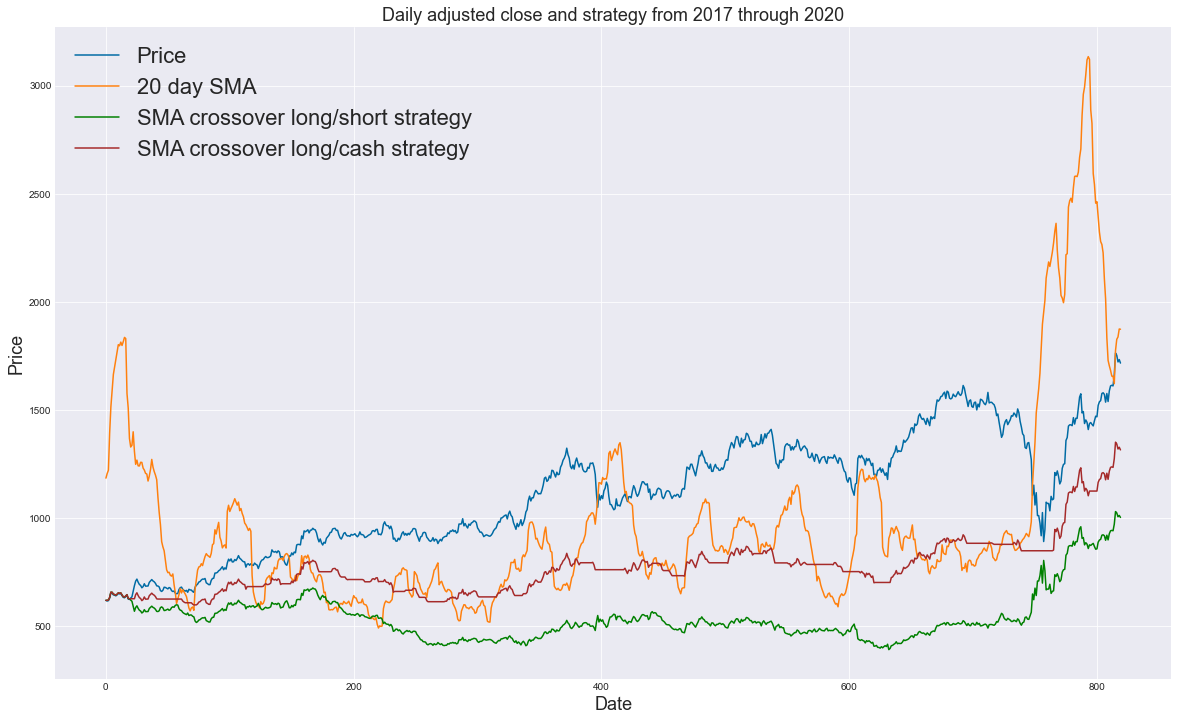

In [133]:
fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(new_df['Price'])
ax1 = plt.plot(new_df['volume']/10000)
ax1 = plt.plot(new_df['LongShort'], color='green')
ax1 = plt.plot(new_df['LongHold'], color='brown')
ax1 = plt.title('Daily adjusted close and strategy from 2017 through 2020', fontsize=18)
ax1 = plt.xlabel('Date', fontsize=18)
ax1 = plt.ylabel('Price', fontsize=18)
ax1 = plt.legend(['Price', '20 day SMA', 'SMA crossover long/short strategy',
 'SMA crossover long/cash strategy'],prop={'size':22}, loc='upper left')
plt.grid(True)
plt.show()